In [67]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [68]:
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
tf.enable_eager_execution()


In [2]:
x = tf.zeros([10,10])

In [3]:
x += 2

In [4]:
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [5]:
v = tf.Variable(1.0)

In [6]:
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [7]:
assert v.numpy() == 1.0

In [8]:
v.assign(3.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [10]:
type(v.numpy())

numpy.float32

In [11]:
tf.square(v)

<tf.Tensor: id=26, shape=(), dtype=float32, numpy=9.0>

In [12]:
tf.add(1,2)

<tf.Tensor: id=30, shape=(), dtype=int32, numpy=3>

In [13]:
tf.add([1,2], [3,4])

<tf.Tensor: id=34, shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [14]:
tf.square(5)


<tf.Tensor: id=37, shape=(), dtype=int32, numpy=25>

In [15]:
tf.square([5,6])

<tf.Tensor: id=40, shape=(2,), dtype=int32, numpy=array([25, 36], dtype=int32)>

In [16]:
tf.reduce_sum([1,2,3])

<tf.Tensor: id=48, shape=(), dtype=int32, numpy=6>

In [17]:
tf.reduce_sum([[1,2],[3,4]])

<tf.Tensor: id=56, shape=(), dtype=int32, numpy=10>

In [18]:
tf.encode_base64('hello world')

<tf.Tensor: id=59, shape=(), dtype=string, numpy=b'aGVsbG8gd29ybGQ'>

In [19]:
x = tf.random_uniform([3,3])

In [20]:
print(x)

tf.Tensor(
[[0.06467509 0.59157515 0.4083165 ]
 [0.10755086 0.57963204 0.2491852 ]
 [0.46462834 0.76311624 0.09599137]], shape=(3, 3), dtype=float32)


In [21]:
tf.test.is_gpu_available()

False

In [22]:
x.device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [23]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6])

In [24]:
ds_tensors

<DatasetV1Adapter shapes: (), types: tf.int32>

In [25]:
print(ds_tensors)

<DatasetV1Adapter shapes: (), types: tf.int32>


In [26]:
ds_tensors.range(1)

<DatasetV1Adapter shapes: (), types: tf.int64>

In [27]:
ds_tensors2 = ds_tensors.map(tf.square).shuffle(2).batch(2)


In [31]:
for x in ds_tensors:
    print(x)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [33]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W * x + self.b
    

In [34]:
model = Model()
assert model(3.0).numpy() == 15.0

In [37]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [61]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000
inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_B+ noise

In [66]:
inputs[999].numpy()


0.57565504

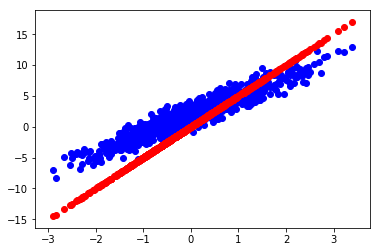

In [72]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [73]:
loss(model(inputs), outputs).numpy()

8.921465

In [74]:
def train(model, inputs, outputs, lr):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

In [75]:
model = Model()

In [76]:
layer = tf.keras.layers.Dense(10)

In [78]:
layer(tf.zeros([1,5]))

<tf.Tensor: id=352, shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [79]:
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.46041948, -0.59445804,  0.3929867 , -0.4508134 ,  0.23531765,
          0.33417094,  0.63106567,  0.48214072,  0.46493608,  0.24550104],
        [-0.63177   , -0.21333   , -0.14856696, -0.33242947, -0.32488245,
         -0.17259929,  0.26480806, -0.36165315, -0.5409467 ,  0.36809987],
        [ 0.30802923,  0.34563464, -0.08053255, -0.4773758 , -0.04444766,
         -0.44655424,  0.1556744 , -0.63034254, -0.04320502, -0.01692641],
        [-0.6298445 ,  0.46664673,  0.21655267, -0.0563454 ,  0.00537354,
         -0.49481896,  0.0673269 ,  0.39368623,  0.56699973, -0.22493955],
        [-0.31604606, -0.2977748 , -0.55701464, -0.0488587 ,  0.6227754 ,
         -0.20226735, -0.22822058, -0.29611793, -0.04717815, -0.5499508 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [1]:
import numpy as np

In [11]:
np.fromstring('0.001 0.22',dtype=np.float, count=2, sep=' ')

array([0.001, 0.22 ])

In [12]:
line = '哈哈 0.001 0.220'

In [16]:
line.split(' ', 1)

['哈哈', '0.001 0.220']